In [10]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-12-27 02:40:02--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   188MB/s    in 0.8s    

2022-12-27 02:40:03 (188 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]

--2022-12-27 02:40:03--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114

In [11]:
import os
import zipfile

zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('tmp/horse-or-human')

zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('tmp/validation-horse-or-human')

zip_ref.close()

In [12]:
train_horse_dir = os.path.join('tmp/horse-or-human/horses')
train_human_dir = os.path.join('tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=1e-4),
              metrics = ['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1/ 255)

train_generator = train_datagen.flow_from_directory(
    'tmp/horse-or-human/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'tmp/validation-horse-or-human/',
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [19]:
EPOCHS = 20

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/20
8/8 [==============================] - 125s 15s/step - loss: 0.6878 - accuracy: 0.5261 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 116s 14s/step - loss: 0.6745 - accuracy: 0.6496 - val_loss: 0.6730 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 116s 14s/step - loss: 0.6573 - accuracy: 0.6440 - val_loss: 0.6671 - val_accuracy: 0.5039
Epoch 4/20
8/8 [==============================] - 114s 14s/step - loss: 0.6209 - accuracy: 0.7230 - val_loss: 0.9512 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 117s 17s/step - loss: 0.5912 - accuracy: 0.7219 - val_loss: 0.6846 - val_accuracy: 0.5156
Epoch 6/20
8/8 [==============================] - 129s 15s/step - loss: 0.5654 - accuracy: 0.7422 - val_loss: 0.6259 - val_accuracy: 0.5664
Epoch 7/20
8/8 [==============================] - 115s 14s/step - loss: 0.5874 - accuracy: 0.7075 - val_loss: 0.6257 - val_accuracy: 0.5664
Epoch 8/20
8/8 [====

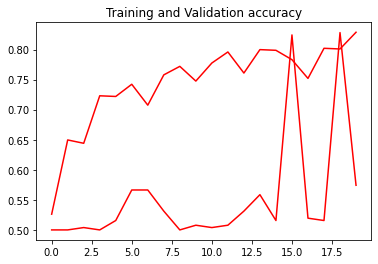

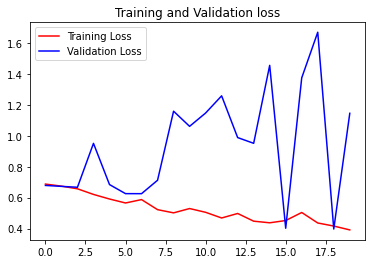

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()